#Exercise 1: Setting Up the Environment

In [21]:
!pip install pgmpy numpy pandas matplotlib

#Exercise 2: Building a Simple DBN

In [23]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

model = DBN([(('Rain', 0), ('Sprinkler', 0)), (('Rain', 0), ('Rain', 1)), (('Rain', 1), ('Sprinkler', 1))])

cpd_rain = TabularCPD(('Rain', 0), 2, [[0.7], [0.3]])
cpd_sprinkler = TabularCPD(('Sprinkler', 0), 2, [[0.8, 0.2], [0.2, 0.8]], evidence=[('Rain', 0)], evidence_card=[2])
cpd_rain_t = TabularCPD(('Rain', 1), 2, [[0.6, 0.4], [0.4, 0.6]], evidence=[('Rain', 0)], evidence_card=[2])
cpd_sprinkler_t = TabularCPD(('Sprinkler', 1), 2, [[0.8, 0.2], [0.2, 0.8]], evidence=[('Rain', 1)], evidence_card=[2])

model.add_cpds(cpd_rain, cpd_sprinkler, cpd_rain_t, cpd_sprinkler_t)

#Exercise 3: Performing Inference

In [24]:
from pgmpy.inference import DBNInference

dbn_infer = DBNInference(model)

query_result = dbn_infer.query([('Sprinkler', 1)], evidence={('Rain', 0): 1})
print(query_result)

{('Sprinkler', 1): <DiscreteFactor representing phi(('Sprinkler', 1):2) at 0x7bd0bc101a50>}


#Exercise 4: Visualizing the DBN


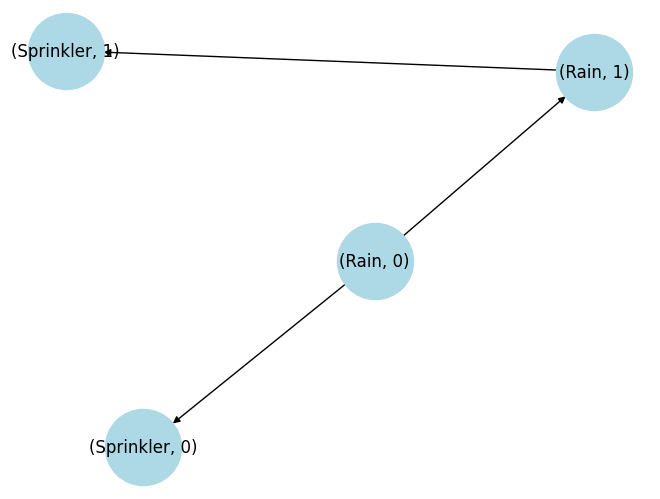

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import DynamicBayesianNetwork

edges = model.edges()

nx_graph = nx.DiGraph()
nx_graph.add_edges_from(edges)

nx.draw(nx_graph, with_labels=True, node_size=3000, node_color='lightblue')
plt.show()

#Exercise 5: Extending the DBN

In [31]:
model.add_edges_from([(('Sprinkler', 0), ('WetGrass', 0)), (('Rain', 0), ('WetGrass', 0))])

cpd_wetgrass = TabularCPD(('WetGrass', 0), 2, [[0.9, 0.2, 0.1, 0.01], [0.1, 0.8, 0.9, 0.99]], evidence=[('Sprinkler', 0), ('Rain', 0)], evidence_card=[2, 2])
model.add_cpds(cpd_wetgrass)